# Importando os módulos

In [5]:
# Analise de dados
import pandas as pd

# plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Visualização de dados 

obs: Neste estudo não irei realizar uma limpeza de dados, pois eles já foram previamente limpos.

In [6]:
# criando o dataframe
df = pd.read_excel(r"C:\Users\renil\Desktop\Projetos\Dataset.xlsx")

In [7]:
# exibindo primeiras 5 linhas do dataframe
print(df.head())

       Post ID                                   Post description        Date  \
0  CgXDOaQDvGm  “I have decided that the global #monkeypox out...  07/23/2022   
1  CgXpRmMIdzG  In light of the evolving monkeypox outbreak wi...  07/23/2022   
2  CgXMyIjP34S  #LinkInBio | The World Health Organization sai...  07/23/2022   
3  CgXaFGDsevq  If you've been hearing about monkeypox and wan...  07/23/2022   
4  CgX3rATJTXd  Our horrific experience with MONKEYPOX…\n\n#mo...  07/23/2022   

  Language                        Translated Post Description Sentiment  \
0  English  “I have decided that the global #monkeypox out...   neutral   
1  English  In light of the evolving monkeypox outbreak wi...   neutral   
2  English  #LinkInBio | The World Health Organization sai...      fear   
3  English  If you've been hearing about monkeypox and wan...   neutral   
4  English  Our horrific experience with MONKEYPOX…\n\n#mo...      fear   

       Hate           Stress or Anxiety  
0  Not Hate     Stre


# Agora já conhecemos melhor a estrutura do nosso dataframe e suas variáveis, sendo elas:

#### Language: Língua original da postagem 
#### Post ID: ID da postagem (cada postagem no Instagram possui um ID único)
#### Post Description: Descrição completa dos posts em inglês 
#### Date: Data de publicação das postagems, no formato mês / dia/ ano
#### Translated Post Description: Versão traduzida para inglês de postagens em outras línguas, utlizando uma API do google
#### Sentiment: Resultado da análise das postagens, onde cada postagem teve um sentimento atribuido, sendo: Neutralidade, Medo, Surpresa, Alegria, Tristeza e Desgosto
#### Hate: Resultado da análise de discurso, que classificou as postagens como tendo ou não discurso de ódio 
#### Anxiety or Stress: Resultado da análise de ansiedade e estresse, que detect se há indícios de ansiedade e estresse ou não nas postagens.

# Exploratory Data Analysis (EDA)

##### Vamos começar nossa análise descobrindo idiomas tiveram mais postagens

In [9]:
# Conta as postagens em cada idioma no nosso dataframe
language_counts = df['Language'].value_counts()

# exibe
print(language_counts)

Language
English         32337
Portuguese       8926
Indonesian       7991
Spanish          3015
Korean           2390
French            766
Hindi             610
Finnish           553
Turkish           455
Italian           339
German            276
Tamil             272
Urdu              236
Thai              212
Arabic            146
Persian           119
Tagalog           118
Dutch              98
Catalan            92
Bengali            92
Marathi            92
Malayalam          83
Swahili            82
Afrikaans          68
Panjabi            63
Gujarati           62
Somali             55
Lithuanian         52
Norwegian          52
Estonian           46
Swedish            46
Telugu             39
Russian            38
Danish             32
Slovak             32
Japanese           30
Kannada            30
Polish             26
Vietnamese         23
Hebrew             18
Romanian           18
Nepali             18
Czech              15
Modern Greek       14
Albanian           11
C

##### Ao análisar a saída acima, podemos descobrir os idiomas que tiveram mais postagens avaliadas, sendo inglês, português e indonésio, os 3 predominantes.

# Quais sentimentos predominam as postagens de cada idioma?
##### agora vamos fazer uma tabela de frequência cruzada para entender qual sentimento predomina as postagems por idioma.

In [12]:
# cria a tabela de frequência cruzada 
language_sentiment_table = pd.crosstab(df['Language'], df['Sentiment'])

# exibe a tabela
print(language_sentiment_table.head(45))                                    

Sentiment     anger  disgust  fear   joy  neutral  sadness  surprise
Language                                                            
Afrikaans         3        3     4     1       53        3         1
Albanian          0        1     7     0        2        1         0
Arabic            1        3    56     5       69        8         4
Bengali           2        1    48     0       37        2         2
Bulgarian         0        0     3     0        2        1         0
Catalan           5        3    12     9       59        3         1
Croatian          1        0     2     0        6        0         2
Czech             0        0     1     1       11        2         0
Danish            0        0     2     3       25        2         0
Dutch             2        2    29     7       55        1         2
English        1034      438  7679  3194    17589     1575       828
Estonian          1        0     7     5       30        2         1
Finnish           3        5     9

##### Agora sabemos qual sentimento predominou as postagens de cada idioma.

## Qual foi o periodo de tempo em que as pessoas se sentiram mais ansiosas com a Mpox?

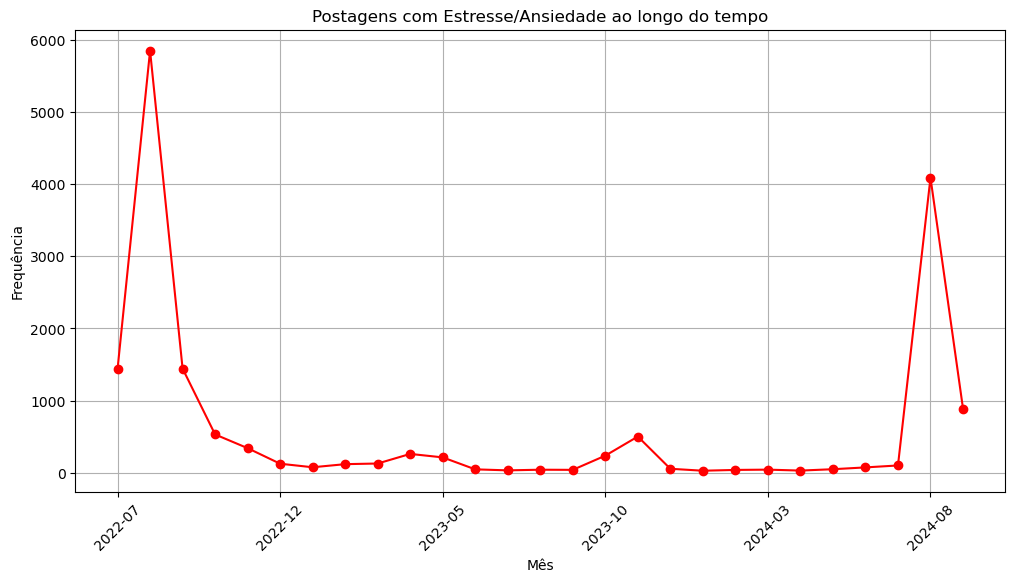

In [50]:
# converte a coluna "Date" para o tipo datetime e evita erros
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extrai o período mensal da coluna "Date"
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Muda o formato das datas para (Ano/Mês) 
anxietyXmonth = df[df['Stress or Anxiety'] == 'Stress/Anxiety Detected'].groupby('Month').size()

# Agrupa os resultados por indíce
anxietyXmonth = anxietyXmonth.sort_index()

# Plota os dados com meses no eixo X
anxietyXmonth.plot(kind='line', figsize=(12, 6), marker='o', color='red')
plt.title("Postagens com Estresse/Ansiedade ao longo do tempo")
plt.xlabel("Mês")
plt.ylabel("Frequência")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### Através desse gráfico podemos observar que o pico de ansiedade/estresse demonstrado nas postagens foi entre julho e agosto, de 2022 um padrão que curiosamente se repetiu nos mesmos meses de 2024, apesar da quantidade menor de ansiedade/estresse

# Qual idioma teve mais discurso de ódio?

In [17]:
resumo_odio = df.groupby(['Language', 'Hate']).size().unstack(fill_value=0)

# Exibe resultados
print("Resumo de posts categorizados como Hate:")
print(resumo_odio)

Resumo de posts categorizados como Hate:
Hate          Hate  Not Hate
Language                    
Afrikaans        7        61
Albanian         1        10
Arabic           1       145
Bengali          1        91
Bulgarian        1         5
Catalan          8        84
Croatian         1        10
Czech            1        14
Danish           0        32
Dutch            7        91
English       1652     30685
Estonian         4        42
Finnish         11       542
French          33       733
German          38       238
Gujarati         2        60
Hebrew           0        18
Hindi            1       609
Hungarian        0         2
Indonesian      33      7958
Italian         14       325
Japanese         0        30
Kannada          0        30
Korean         513      1877
Latvian          0         2
Lithuanian       3        49
Malayalam        0        83
Marathi          2        90
Modern Greek     0        14
Nepali           0        18
Norwegian        2        50
Pa

##### Com a saída acima, podemos obsercar quais idiomas tiveram mais posts de ódio

# Por último, vamos medir a correlação entre as variaveis

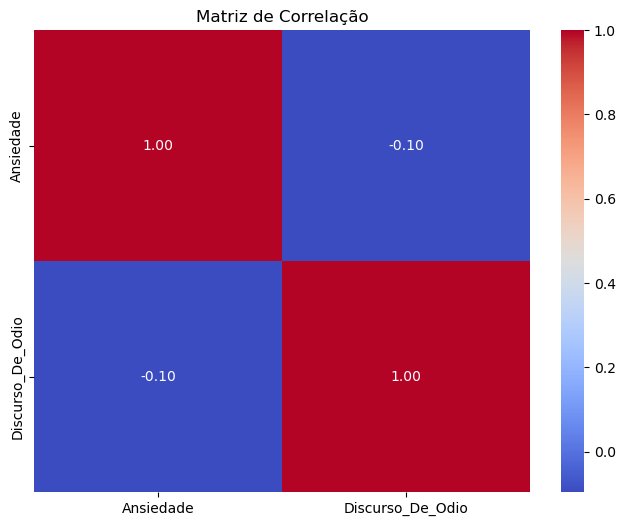

In [19]:
# transforma as strings em variáveis categoricas
df['Ansiedade'] = df['Stress or Anxiety'].map({'Stress/Anxiety Detected': 1, 'No Stress/Anxiety Detected': 0})
df['Discurso_De_Odio'] = df['Hate'].map({'Hate': 1, 'Not Hate': 0})

dados_corr = df[['Ansiedade', 'Discurso_De_Odio']]

# Calcula a matriz de correlação
correlacao = dados_corr.corr()

# exibe a matriz de correlação como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

##### Nessa matriz de correlação, podemos obsevar que a ansiedade e o discurso de ódio tem correlação negativa, ou seja, raramente uma postagem indica discurso de ódio e ansiedade juntos.

# Então qual sentimento esta mais relacionado ao discurso de ódio?

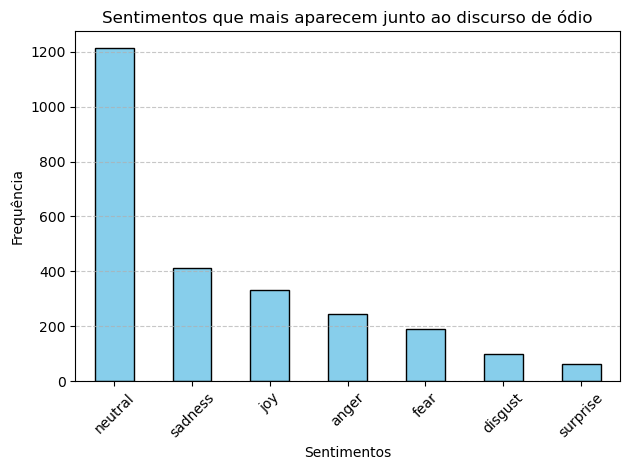

In [40]:
# Isola casos de discurso de ódio 
casos_De_odio = df[df['Hate'] == 'Hate']
odioXsentimentos_count = casos_De_odio['Sentiment'].value_counts()

# cria o gráfico
odioXsentimentos_count.plot(kind='bar', color='skyblue', edgecolor='black')

# Ajusta o gáfico
plt.title('Sentimentos que mais aparecem junto ao discurso de ódio')
plt.xlabel('Sentimentos')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# exibe o gráfico
plt.tight_layout()
plt.show()


# Conclusão 

### Através da simples análise desses dados conseguimos chegar a algumas conclusões, como:

##### Inglês, Indonésio e Português foram os idiomas com mais postagens avaliadas 
##### A maiora das postagens teve o sentimento neutro atribuido a elas.
##### Os periodos de pico de ansiedade em relação a varíola dos macacos foram entre Julho e Agosto de 2022, e depois também entre Julho e Agosto porém de 2024, 2023 foi o periodo com menos ansiedade em relação a esse assunto
##### Os idiomas em que as postagens apresentaram mais discurso de ódio foram o africâner, albanês e arabe.
##### Ansiedade e Discurso de ódio tem baixa correlação, ou seja, um não costuma aparecer junto ao outro 
##### O sentimento que mais aparece junto ao discurso de ódio é a tristeza

